# STA365 Homework 1

## Question 1
What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class, while the probability drops to 0.3 if you'll not pass the class. 


### Answer

pass: P = 1; fail: P = 0
answer: Q = 1; not answer: Q = 0

Given $\Pr(P=1) = 0.9$, then $\Pr(P=0) = 1- \Pr(P=1) = 0.1$.
Given $\Pr(Q=1|P=1) = 0.6, \Pr(Q=1|P=0) = 0.3$
\begin{align*}
\Pr(P=1|Q=1) &= \frac{\Pr(Q=1|P=1) \Pr(P=1)}{\Pr(Q=1)} \text{   by Bayes' Theorem}\\
&=\frac{\Pr(Q=1|P=1) \Pr(P=1)}{\Pr(Q=1|P=1)\Pr(P=1) + \Pr(Q=1|P=0)\Pr(P=0)} \text{   by Law of total probability}\\
&= \frac{0.6(0.9)}{0.6(0.9) + 0.3(0.1)} \\
&= \frac{54}{57} \\
& \approx 0.9473
\end{align*}
Around 94.73% of the students who answer the question quickly will pass the class.

## Question 2
Q2: 
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}


_The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

_and the posterior is always a proper distribution if the prior is_

### Answer

Data $\boldsymbol{x} = (x_1, ..., x_K)$ are observed counts in $K$ categories, where $n = \sum^K_{i=1} x_i$.

Unknown parameters: $\boldsymbol{\theta} = (\theta_1, \cdots \theta_K)$ where each 
$\theta_i$ is the probability of category $i$, and $\sum^K_{i=1} \theta_i = 1$. 

The Likelihood is the probability of observing counts $\boldsymbol{x}$ given $\boldsymbol{\theta}$ is 

\begin{align*}
p(\boldsymbol{x}|\boldsymbol{\theta},n) &= \frac{n!}{x_1!x2!\cdots x_K!} \prod_{i=1}^K \theta_i^{x_i}
\end{align*}

The Prior on $\boldsymbol{\theta}$ is Dirichlet distribution

\begin{align*}
p(\boldsymbol{\theta}|\boldsymbol{\alpha}) &= \frac{1}{B(\boldsymbol{\alpha})} \prod^K_{i=1} \theta^{\alpha_i - 1}
\end{align*}

Posterior

\begin{align*}
p(\boldsymbol{\theta}|\boldsymbol{x}, n, \boldsymbol{\alpha}) &={} \frac{p(\boldsymbol{x}|\boldsymbol{\theta}) p(\boldsymbol{\theta})}{p(\boldsymbol{x})} \\
&= \frac{1}{p (\boldsymbol{x})} \frac{n!}{x_1!x2!\cdots x_K!} \prod_{i=1}^K \theta_i^{x_i} \frac{1}{B(\boldsymbol{\alpha})} \prod^K_{i=1} \theta^{\alpha_i - 1}
\\
&= \textcolor{blue}{ \frac{1}{p (\boldsymbol{x})} \frac{n!}{x_1!x2!\cdots x_K!}\frac{1} {B(\boldsymbol{\alpha})}} \prod_{i=1}^K \theta_i^{x_i} \prod^K_{i=1} \theta^{\alpha_i - 1} \\
&= \textcolor{blue}{ \frac{1}{p (\boldsymbol{x})} \frac{n!}{x_1!x2!\cdots x_K!}\frac{1} {B(\boldsymbol{\alpha})}} \prod_{i=1}^K \theta_i^{x_i + \alpha_i -1}  \\
\text{the blue parts are all constant, so the posterior} & \propto \prod_{i=1}^K \theta_i^{x_i + \alpha_i -1}
\end{align*} 
which matches the kernel of a dirichlet distribution. Its parameters are $\boldsymbol{\alpha'} = (\alpha_1 + x_1, \cdots, \alpha_K + x_K)$

## Question 3

Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.


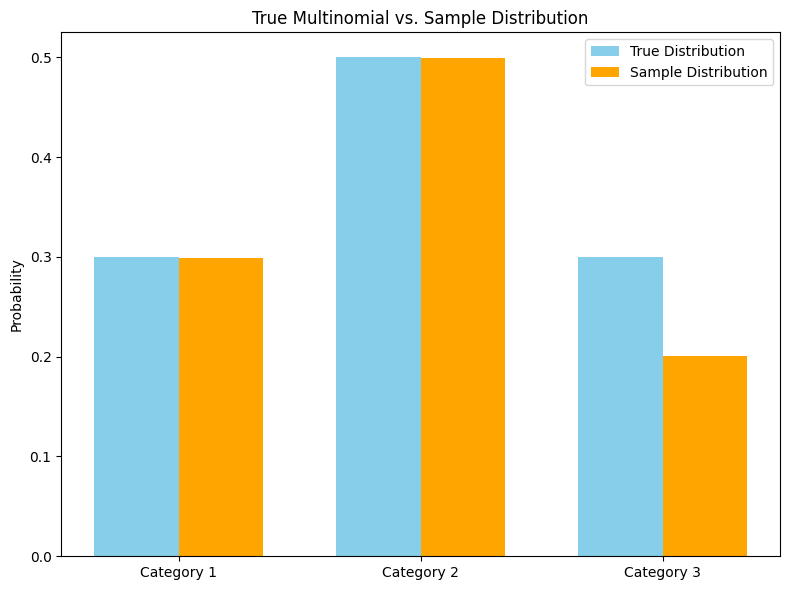

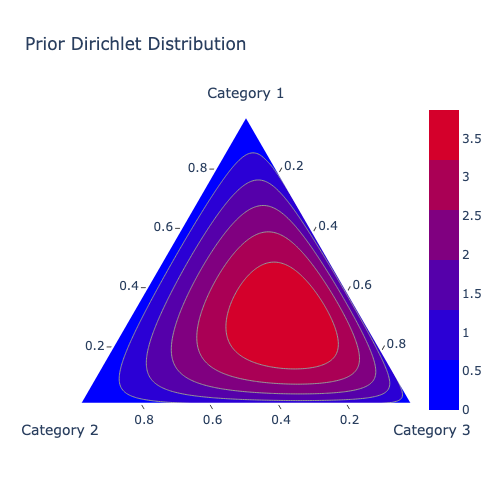

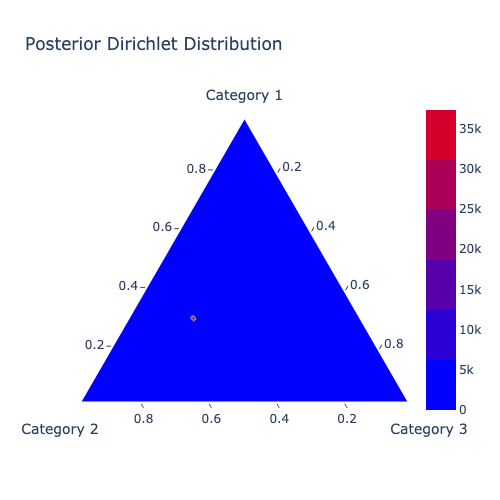

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import multinomial
import plotly.figure_factory as ff

# seed
np.random.seed(365)

n_trials = 500  
true_probs = [0.3, 0.5, 0.3]  # define true category probabilities

samples = multinomial.rvs(n=n_trials, p=true_probs, size=100)

avg_sample_counts = samples.mean(axis=0) / n_trials
categories = ['Category 1', 'Category 2', 'Category 3']

x = np.arange(len(categories))  
width = 0.35 

fig, ax = plt.subplots(figsize=(8, 6))

# distribution bars
bars1 = ax.bar(x - width/2, true_probs, width, label='True Distribution', color='skyblue')

bars2 = ax.bar(x + width/2, avg_sample_counts, width, label='Sample Distribution', color='orange')

ax.set_ylabel('Probability')
ax.set_title('True Multinomial vs. Sample Distribution')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

# Define the Dirichlet prior
alpha_prior = np.array([1.6, 1.5, 2])  
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)

# Update the prior to get the posterior
observed_counts = samples.sum(axis=0)  # Sum across all samples
alpha_posterior = alpha_prior + observed_counts
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)

# ternary plot grid
p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
valid = (p3 >= 0)
p = np.c_[p1[valid], p2[valid], p3[valid]]

# densities for prior and posterior
prior_densities = dirichlet_prior.pdf(p.T)
posterior_densities = dirichlet_posterior.pdf(p.T)

# ternary plot
fig_prior = ff.create_ternary_contour(
    p.T, prior_densities,
    pole_labels=['Category 1', 'Category 2', 'Category 3'],
    interp_mode='cartesian',
    showscale=True,
    title='Prior Dirichlet Distribution'
)

fig_prior.show('png')

fig_posterior = ff.create_ternary_contour(
    p.T, posterior_densities,
    pole_labels=['Category 1', 'Category 2', 'Category 3'],
    interp_mode='cartesian',
    showscale=True,
    title='Posterior Dirichlet Distribution'
)

fig_posterior.show('png')